# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests as rq 
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

619

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
city_list = []
cloud_list = []
country_list = []
date_list = []
humidity_list = []
lats_list = []
lngs_list = []
temp_max_list = []
wind_speed_list = []
index_counter = 0
set_counter = 1

In [4]:
print("Beginning Data Retrieval ")
print("-------------------------------")

base_url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{base_url}appid={weather_api_key}&units={units}&q="

#For loop matching city names with city_list
for index, city in enumerate(cities, start = 1):
    try:
        response = rq.get(query_url + city).json()
        city_list.append(response["name"])
        cloud_list.append(response["clouds"]["all"])
        country_list.append(response["sys"]["country"])
        date_list.append(response["dt"])
        humidity_list.append(response["main"]["humidity"])
        lats_list.append(response["coord"]["lat"])
        lngs_list.append(response["coord"]["lon"])
        temp_max_list.append(response['main']['temp_max'])
        wind_speed_list.append(response["wind"]["speed"])
        if index_counter > 49:
            index_counter = 0
            set_counter = set_counter + 1
        
        else:
            index_counter = index_counter + 1
        
        print(f"Processing Record {index_counter} of Set {set_counter} : {city}")
        
    except(KeyError, IndexError):
        print("City not found. Skipping...")
        
print("-------------------------------")
print("Data Retrieval Complete")
print("-------------------------------")

Beginning Data Retrieval 
-------------------------------
Processing Record 1 of Set 1 : punta arenas
City not found. Skipping...
City not found. Skipping...
Processing Record 2 of Set 1 : saint-philippe
Processing Record 3 of Set 1 : amapa
Processing Record 4 of Set 1 : port elizabeth
Processing Record 5 of Set 1 : baiyin
Processing Record 6 of Set 1 : ojinaga
Processing Record 7 of Set 1 : cherskiy
Processing Record 8 of Set 1 : geraldton
Processing Record 9 of Set 1 : agara
Processing Record 10 of Set 1 : usilampatti
Processing Record 11 of Set 1 : olafsvik
Processing Record 12 of Set 1 : peniche
City not found. Skipping...
Processing Record 13 of Set 1 : hashtgerd
Processing Record 14 of Set 1 : cefalu
Processing Record 15 of Set 1 : bredasdorp
Processing Record 16 of Set 1 : fairbanks
Processing Record 17 of Set 1 : hasaki
Processing Record 18 of Set 1 : half moon bay
Processing Record 19 of Set 1 : vaini
Processing Record 20 of Set 1 : busselton
Processing Record 21 of Set 1 : ka

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_data = pd.DataFrame({
    "City" : city_list,
    "Lat" : lats_list,
    "Lng" : lngs_list,
    "Max Temp" : temp_max_list,
    "Humidity" : humidity_list,
    "Clouds" : cloud_list,
    "Wind Speed" : wind_speed_list,
    "Country" : country_list,
    "Date" : date_list    
})
weather_data

,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
0,Punta Arenas,-53.1500,-70.9167,10.73,61,75,2.37,CL,1620926416
1,Saint-Philippe,-21.3585,55.7679,25.03,78,35,4.39,RE,1620926534
2,Amapá,1.0000,-52.0000,23.79,98,100,0.34,BR,1620926535
3,Port Elizabeth,-33.9180,25.5701,16.24,88,0,2.06,ZA,1620926535
4,Baiyin,36.5583,104.2081,47.35,54,32,5.48,CN,1620926535
...,...,...,...,...,...,...,...,...,...
559,Vila Franca do Campo,37.7167,-25.4333,20.51,66,65,3.98,PT,1620926688
560,Horn Lake,34.9554,-90.0348,21.62,32,1,4.92,US,1620926408
561,Puerto Quijarro,-17.7833,-57.7667,29.35,39,99,1.15,BO,1620926688
562,Altea,38.5989,-0.0514,28.04,91,27,5.78,ES,1620926688


In [7]:
weather_data.to_csv("../output_data/cities.csv", index=False)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [ ]:
#  Get the indices of cities that have humidity over 100%.


In [ ]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

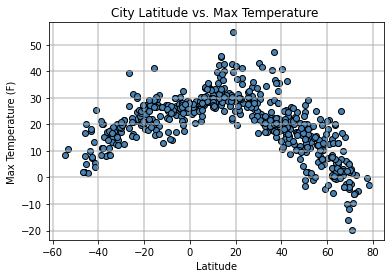

In [12]:
plt.scatter(weather_data["Lat"], weather_data["Max Temp"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Max Temperature ")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../output_data/City Latitude vs Max Temperature.png")

## Latitude vs. Humidity Plot

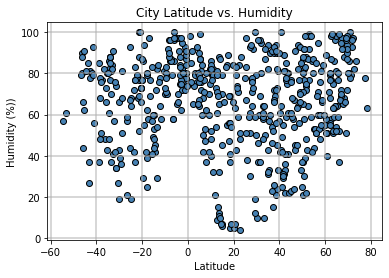

In [14]:
plt.scatter(weather_data["Lat"], weather_data["Humidity"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../output_data/City Latitude vs Humidity.png")

## Latitude vs. Cloudiness Plot

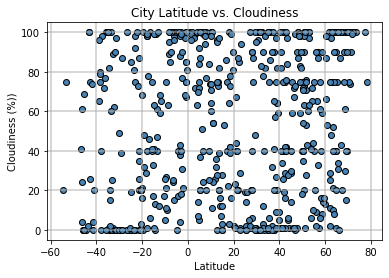

In [17]:
plt.scatter(weather_data["Lat"], weather_data["Clouds"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../output_data/City Latitude vs Cloudiness.png")

## Latitude vs. Wind Speed Plot

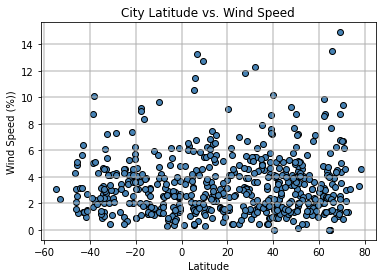

In [19]:
plt.scatter(weather_data["Lat"], weather_data["Wind Speed"], color = "steelblue", edgecolor = "black")

plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (%))")
plt.grid(linestyle='-', linewidth=2, alpha=0.5)
plt.savefig("../output_data/City Latitude vs Wind Speed.png")

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [24]:
northern_df = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) > 0, :]
southern_df = weather_data.loc[pd.to_numeric(weather_data["Lat"]).astype(float) < 0, :]
northern_df


,City,Lat,Lng,Max Temp,Humidity,Clouds,Wind Speed,Country,Date
2,Amapá,1.0000,-52.0000,23.79,98,100,0.34,BR,1620926535
4,Baiyin,36.5583,104.2081,47.35,54,32,5.48,CN,1620926535
5,Ojinaga,29.5667,-104.4167,24.68,50,1,3.09,MX,1620926535
6,Cherskiy,68.7500,161.3000,-9.86,97,61,1.43,RU,1620926536
8,Agara,42.0376,43.8238,16.13,89,75,2.21,GE,1620926536
...,...,...,...,...,...,...,...,...,...
553,Tarazá,7.5836,-75.4007,33.14,53,98,1.67,CO,1620926686
559,Vila Franca do Campo,37.7167,-25.4333,20.51,66,65,3.98,PT,1620926688
560,Horn Lake,34.9554,-90.0348,21.62,32,1,4.92,US,1620926408
562,Altea,38.5989,-0.0514,28.04,91,27,5.78,ES,1620926688


Regression line equation is: y =-0.47x + 37.72.
The r-squared is: -0.8004427926495993
The regression displays a negative correlation.
In the Northern Hemisphere, this plot shows that the temperature decreases while increasing latitude.


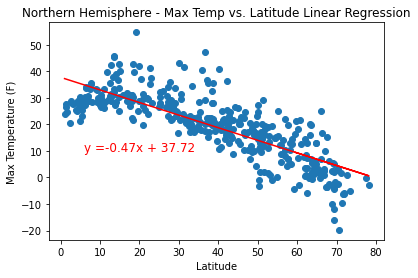

<Figure size 432x288 with 0 Axes>

In [26]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the Northern Hemisphere, this plot shows that the temperature decreases while increasing latitude.")
      
plt.show()
plt.savefig("../output_data/Northern Hemisphere-Max Temp vs Latitude Linear Regression'.png")


####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

Regression line equation is: y =0.37x + 28.75.
The r-squared is: 0.7107186789376279
The regression displays a positive correlation.
In the Southern Hemisphere, this plot shows that the temperature increases while getting closer to the equator.


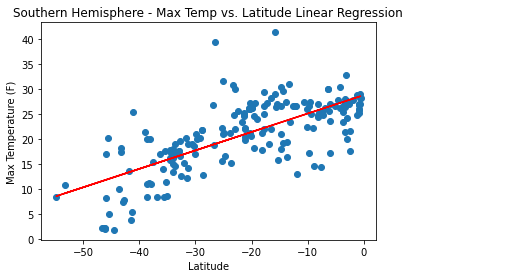

In [28]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Max Temp']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (F)')
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Southern Hemisphere, this plot shows that the temperature increases while getting closer to the equator.")
      
plt.show()


####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =0.18x + 58.11.
The r-squared is: 0.1593967271247853
The regression displays a positive correlation.
In the Northern Hemisphere, this plot shows that humidity slightly increases with latitude.


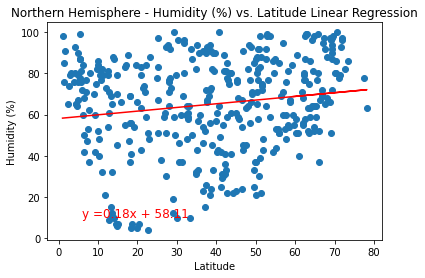

In [29]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Northern Hemisphere, this plot shows that humidity slightly increases with latitude.")
      
plt.show()


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

Regression line equation is: y =0.34x + 77.36.
The r-squared is: 0.2487056696219344
The regression displays a positive correlation.
In the Southern Hemisphere, this plot shows that the humidity stays consistent while moving closer to the equator.


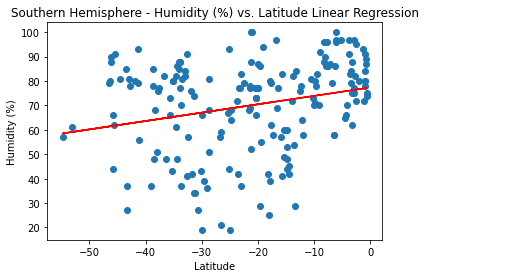

In [30]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Humidity']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.title('Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Southern Hemisphere, this plot shows that the humidity stays consistent while moving closer to the equator.")
      
plt.show()


####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =0.15x + 49.52.
The r-squared is: 0.08604393866441759
The regression displays a positive correlation.
In the Northern Hemisphere, this plot shows that cloudiness increases with latitude.


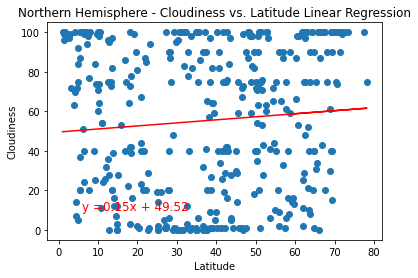

In [32]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Northern Hemisphere, this plot shows that cloudiness increases with latitude.")
      
plt.show()


####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

Regression line equation is: y =0.71x + 63.24.
The r-squared is: 0.25432020096489427
The regression displays a positive correlation.
In the Southern Hemisphere, this plot shows that the cloudiness slightly increases while moving closer to the equator.


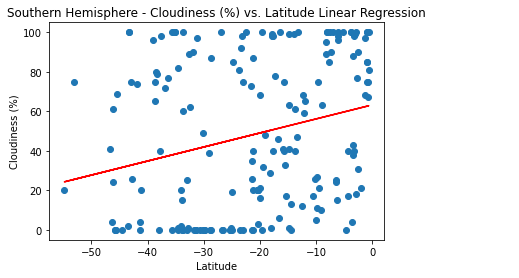

In [34]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Clouds']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.title('Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a positive correlation.")
print("In the Southern Hemisphere, this plot shows that the cloudiness slightly increases while moving closer to the equator.")
      
plt.show()


####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =-0.0x + 3.54.
The r-squared is: -0.005751592752366842
The regression displays a neutral/slightly positive correlation.
In the Northern Hemisphere, this plot shows that wind speed stays consistent or slightly increases with latitude.


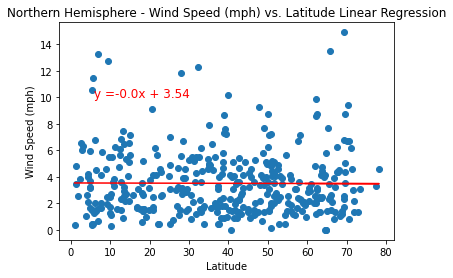

In [35]:
x_values = pd.to_numeric(northern_df['Lat']).astype(float)
y_values = pd.to_numeric(northern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a neutral/slightly positive correlation.")
print("In the Northern Hemisphere, this plot shows that wind speed stays consistent or slightly increases with latitude.")
      
plt.show()


####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

Regression line equation is: y =-0.02x + 2.81.
The r-squared is: -0.10942533867257981
The regression displays a negative correlation.
In the Southern Hemisphere, this plot shows that the wind speed slightly decreases while moving closer to the equator.


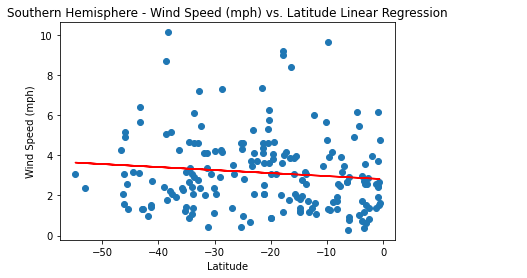

In [36]:
x_values = pd.to_numeric(southern_df['Lat']).astype(float)
y_values = pd.to_numeric(southern_df['Wind Speed']).astype(float)
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y =" + str(round(slope,2)) + "x + " + str(round(intercept,2))
print(f"Regression line equation is: {line_eq}.")
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values, "r-")
plt.annotate(line_eq,(6,10),fontsize=12,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.title('Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression')
print(f"The r-squared is: {rvalue}")
print("The regression displays a negative correlation.")
print("In the Southern Hemisphere, this plot shows that the wind speed slightly decreases while moving closer to the equator.")
      
plt.show()
